# Association Rules
## Example with the [__Online Retail__](https://archive.ics.uci.edu/ml/datasets/online+retail) dataset, from UCI

Code provided in this [link](http://pbpython.com/market-basket-analysis.html)

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import matplotlib.pyplot as plt
%matplotlib inline

Upload the file `'Online-Retail.xlsx'`. It is a MS Excel file, you can read it with the Pandas' function `read_excel` (it might take a while, use the csv version of the dataset if the process is too slow).

Inspect its content. It is a transactional database where the role of transaction identifier is played by the column `InvoiceNo` and the items are in the column `Description`.

The database has some problems:
1. some descriptions represent the same item but have different leading or trailing spaces, therefore they must be made uniform with the Pandas' function `str.strip()`

In [2]:
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
# url = 'machineLearning-05-association-rules-lab/Online-Retail.xlsx'
# url = 'Online-Retail.xlsx'
# df0 = pd.read_excel(url)

# Snippet for Colab execution. If not in Colab this will run without interference
try:
    from google.colab import files

    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    uploaded = files.upload()  # if executing in Colab this will open
    # a file upload dialog

url = "Online-Retail-France.xlsx"
df0 = pd.read_excel(url)
df0.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2010-12-01 08:45:00,1.25,12583.0
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-12-01 08:45:00,2.95,12583.0
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-12-01 08:45:00,2.95,12583.0
9,536370,22629,SPACEBOY LUNCH BOX,24,2010-12-01 08:45:00,1.95,12583.0


In [3]:
print(
    "The number of unique Description values in the input file is {}".format(
        len(df0["Description"].unique())
    )
)



# extra nostro per fare lo stesso per tutti gli attributi


for a in df0.columns:

    print(
        "The number of unique "
        + str(a)
        + " values in the input file is: "
        + str(df0[a].unique().size)
    )

The number of unique Description values in the input file is 1565
The number of unique InvoiceNo values in the input file is: 461
The number of unique StockCode values in the input file is: 1543
The number of unique Description values in the input file is: 1565
The number of unique Quantity values in the input file is: 77
The number of unique InvoiceDate values in the input file is: 461
The number of unique UnitPrice values in the input file is: 97
The number of unique CustomerID values in the input file is: 88


In [4]:
# rimozione delle righe con description con spazi extra
df1 = df0
df1["Description"] = df0["Description"].str.strip()

In [5]:
print(
    "After cleaning, the number of unique Description values in the input file is {}".format(
        len(df1["Description"].unique())
    )
)

After cleaning, the number of unique Description values in the input file is 1564


Some rows may not have an `InvoiceNo` and must be removed, because they cannot be used.

Check if there are such that rows and in case remove them. You can check with the Pandas' function `isna` and remove with `dropna` on `axis=0`, with the option `subset`

In [6]:
print("Rows with missing InvoiceNo before removing")
df1[df1["InvoiceNo"].isna()]

Rows with missing InvoiceNo before removing


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


In [7]:
df2 = df1.dropna(axis=0, subset=["InvoiceNo"])


# marco lorenzo abbiamo aggiunto parametro inplace=True per sovrascrivere il dataframe
# dfNoNull.dropna(axis = 0, subset=['InvoiceNo'], inplace=True)

In [8]:
print("Rows with missing InvoiceNo after removing")
df2[df2["InvoiceNo"].isna()]

Rows with missing InvoiceNo after removing


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


Some InvoiceNo start with a `C`. They are "credit transactions" and must be removed.

Check the number of rows containing `C` in `InvoiceNo` and remove them. 
At the moment the column `InvoiceNo` is a generic object, in order to be 
able to use string functions, such as `contains`, it must be transformed into `str` with `astype`.

In [9]:
# Controllo di righe che CONTENGONO C nell'attributo InvoiceNo
print(
    "There are {} rows containing 'C' in 'InvoiceNo'".format(
        sum(df2["InvoiceNo"].astype("str").str.contains("C"))
    )
)

# Rimozione di righe che CONTENGONO C nell'attributo InvoiceNo
df3 = df2[~df2["InvoiceNo"].astype("str").str.contains("C")]

# Noi abbiamo fatto Rimozione di righe hanno l'attributo InvoiceNo che COMINCIA con C
# rowsWithInvoiceNoWithC = dfNoNull['InvoiceNo'].str.startswith('C',na=False)
# dfNoNull[rowsWithInvoiceNoWithC].shape[0]

There are 149 rows containing 'C' in 'InvoiceNo'


In [10]:
print(
    "After removal, there are {} rows containing 'C' in 'InvoiceNo'".format(
        sum(df3["InvoiceNo"].astype("str").str.contains("C"))
    )
)

After removal, there are 0 rows containing 'C' in 'InvoiceNo'


Several transactions include the item `'POSTAGE'`, 
which represents the mailing expenses. 
In this analysis we are not interested in it, therefore the rows 
with `'POSTAGE'` will be removed.

In [11]:
container = "Description"
target = "POSTAGE"
print(
    "There are {} rows containing {} in {}".format(
        sum(df2[container].astype("str").str.contains(target)), target, container
    )
)


# IL PROF HA DIMENTICATO DI CANCELLARE LE RIGHE!! Noi abbiamo fatto così
# check
# rowsWithPostage = dfWithoutC[dfWithoutC['Description'].str.contains('POSTAGE', na=False)]
# print("Rows with Postage: "+str(rowsWithPostage.shape[0]))

# rimozione
# dfWithoutPostage = dfWithoutC.drop(rowsWithPostage.index)
# print(dfWithoutPostage.shape)

There are 311 rows containing POSTAGE in Description


In [12]:
df = df3[~df3[container].astype("str").str.contains(target)]

In [13]:
df.describe

<bound method NDFrame.describe of      InvoiceNo StockCode                      Description  Quantity  \
0       536370     22728        ALARM CLOCK BAKELIKE PINK        24   
1       536370     22727         ALARM CLOCK BAKELIKE RED        24   
2       536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
3       536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
4       536370     21883                  STARS GIFT TAPE        24   
...        ...       ...                              ...       ...   
8552    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
8553    581587     22899      CHILDREN'S APRON DOLLY GIRL         6   
8554    581587     23254     CHILDRENS CUTLERY DOLLY GIRL         4   
8555    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
8556    581587     22138     BAKING SET 9 PIECE RETROSPOT         3   

              InvoiceDate  UnitPrice  CustomerID  
0     2010-12-01 08:45:00       3.75     12583.0  
1     2010-

After the cleanup, we need to consolidate the items into 1 transaction per row with each product 1 hot encoded. For the sake of keeping the data set small, we are only looking at sales for France. However, in additional code below, we will compare these results to sales from Germany. Further country comparisons would be interesting to investigate.

Actions:
1. filter the rows ``Country`='France'`
2. group by `['InvoiceNo', 'Description']` computing a sum on `['Quantity']`
3. use the `unstack` function to move the items from rows to columns
4. reset the index
5. fill the missing with zero (`fillna(0)`)
6. store the result in the new dataframe `basket` and inspect it

In [14]:
basket = (
    df.groupby(["InvoiceNo", "Description"])["Quantity"]
    .sum()
    .unstack()
    .reset_index()
    .fillna(0)
    .set_index("InvoiceNo")
)


basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 and anything less than 0 is set to 0.

You can define a function `encode_units` which takes a number and returns 0 if the number is 0 or less, 1 if the number is 1 or more. The function can be applied to `basket` with the Pandas' function `applymap`, the result is stored in the variable `basket_sets`

This step will complete the one hot encoding of the data.

In [15]:
encode_units = lambda x: 0 if x <= 0 else 1
basket_sets = basket.applymap(encode_units)

# Noi abbiamo fatto così
"""
def encode_units(num):
    res = num
    if res <=0:
        return 0
    if res >=1:
        return 1
    return res 
"""

C:\Users\evang.HOMEEVANGELISTI\AppData\Local\Temp\ipykernel_15540\82366512.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


'\ndef encode_units(num):\n    res = num\n    if res <=0:\n        return 0\n    if res >=1:\n        return 1\n    return res \n'

Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7% (this number was chosen so that we can get enough useful examples):

- generate the `frequent_itemsets` with `apriori`, setting `min_support=0.07` and `use_colnames=True`
- generate the `rules` with `association_rules` using `metric="lift"` and `min_threshold=1`
- show the rules

In [16]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.shape

c:\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


(26, 10)

In order to plot the rules, it is better to sort them according to some metrics.
We will sort on descending confidence and support and plot `'confidence'` and `'support'`.

<Axes: title={'center': 'Association Rules'}>

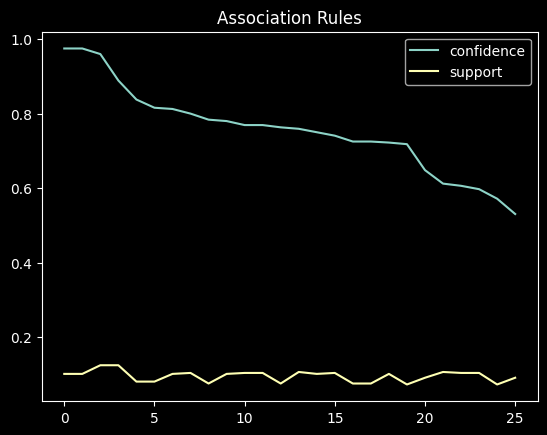

In [17]:
sorted_rules = rules.sort_values(
    by=["confidence", "support"], ascending=False
).reset_index(drop=True)


sorted_rules[["confidence", "support"]].plot(title="Association Rules")



# plt.plot(np.arange(sorted_rules.shape[0]),sorted_rules.confidence)


# plt.plot(np.arange(sorted_rules.shape[0]),sorted_rules.support )

You find below a three dimensional plot, where the dot size is proportional to the lift, obtained using `plot.scatter`.

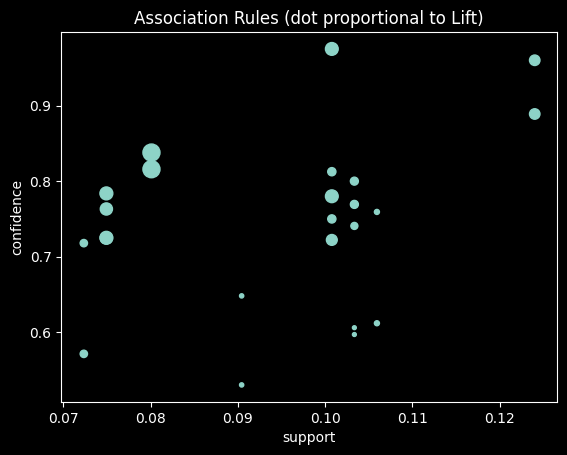

In [18]:
# 1.8 is chosen empirically to obtain the best graphical effect
s = [1.8**n for n in rules.lift]
fig = rules.plot.scatter(
    x="support",
    y="confidence",
    title="Association Rules (dot proportional to Lift)",
    s=s,
)

# extra per aggiungere le label sul grafico
# for i in range(len(rules)):
#    fig.annotate(text = i, xy = (sorted_rules['support'][i], sorted_rules['confidence'][i]))


# Noi abbiamo fatto così ed esce uguale
# plt.scatter(rules_sort.support,rules_sort.confidence,s=rules_sort.lift**2)

In [19]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


Finally, we draw a plot of a subset of the rules using the function `draw_graph`, provided in this package.

In [20]:
from draw_rules_graph import draw_graph

help(draw_graph)

ModuleNotFoundError: No module named 'draw_rules_graph'

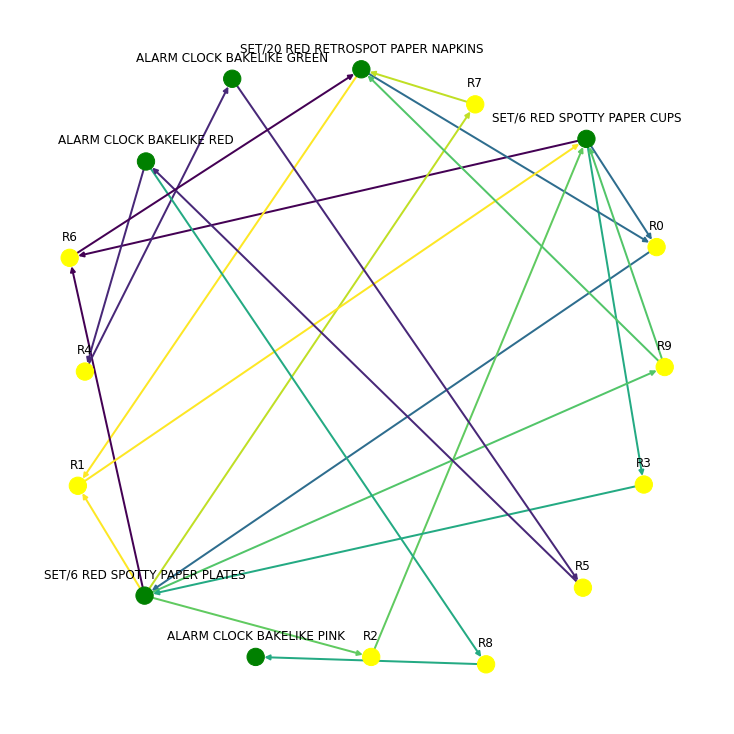

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
draw_graph(sorted_rules, 10)

### EXTRA da file di testo a DATAFRAME 
da file a transazioni

In [ ]:
separator = ";"

# Open the file
file = open(url, mode="r")

# The transactions are separated by a ';'


# We must also strip the '\n' at the end of the transaction


transactions = [line.strip("\n").split(separator) for line in file.readlines()]



print(
    f"First transaction:\t{transactions[0]}\n\nSecond transaction:\t{transactions[1]}"
)

First transaction:	['InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country']

Second transaction:	['536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom']


Da transazioni a Dataframe  
TRANSACTION ENCODER

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Encode the transactions
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# Put the data in a dataframe
df = pd.DataFrame(encoded_transactions.astype(int), columns=encoder.columns_)
df.head()

MemoryError: Unable to allocate 271. GiB for an array with shape (541910, 536642) and data type bool

### EXTRA Algoritmo apriori con parametri minimi
Find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items. Output the result with the message below (5 points)


In [ ]:
# Requirements
import numpy as np
import warnings

warnings.filterwarnings("ignore")  # uncomment this line to suppress warnings

min_itemsets = 8
min_item_in_itemset = 2

# "Reasonable" range
support_range = np.arange(0.1, 0.01, -0.01)

min_support = 0

for s_value in support_range:
    print(f"Trying support value {s_value:.2f}")

    frequent_itemsets = apriori(df, min_support=s_value, use_colnames=True)
    # use_colnames = True obbligatorio, altrimenti prende gli indici e non i nomi degli item

    # Calculate the number of itemsets that contain at least `min_item_in_itemset` items
    itemsets_above_threshold = sum(
        [len(itemset) >= min_item_in_itemset for itemset in frequent_itemsets.itemsets]
    )

    if itemsets_above_threshold >= min_itemsets:
        min_support = s_value
        break

if min_support == 0:
    print("No itemset found! Try again with a bigger range!")
else:
    print(
        f"I've selected min_support = {min_support:.2f}, which produced {len(frequent_itemsets)} itemsets, {itemsets_above_threshold} of which had more than {min_item_in_itemset} items"
    )

### EXTRA Algoritmo association rules con parametri minimi
Find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found (5 points)
_use "confidence" as metric and output the line below:_

In [ ]:
# Threshold
min_rules = 10

# "Reasonable" range
confidence_range = np.arange(1, 0.01, -0.01)


min_confidence = 0

for c_value in confidence_range:
    print(f"Trying confidence value {c_value:.2f}")
    rules = association_rules(
        frequent_itemsets, metric="confidence", min_threshold=c_value
    )

    if len(rules) >= min_rules:
        min_confidence = c_value
        break

if min_confidence == 0:
    print("No rule set met the requirements! Try again with a bigger range!")
else:
    print(
        f"I've selected min_confidence = {min_confidence:.2f}, which produced {len(rules)} rules"
    )

print(
    f'Metric: "confidence" - min_metric: {min_confidence:.4f} - Number of rules: {len(rules)}'
)